##### <div style="color:brown;background-color:lightblue;padding:3%;border-radius:150px 150px;font-size:2em;text-align:center">Predicting House Prices</div>

## <a id="60" style="color:brown">Importing packages</a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
import warnings 
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
from sklearn.decomposition import PCA

## <a id="60" style="color:brown">Loading Dataset</a>

In [2]:
df=pd.read_csv("Housing.csv")

In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [6]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [7]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [8]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [9]:
df.shape

(545, 13)

In [10]:
df.duplicated().sum()

0

## <a id="60" style="color:brown">Exploratory Data Analysis</a>

In [11]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


  **Outlier Analysis**

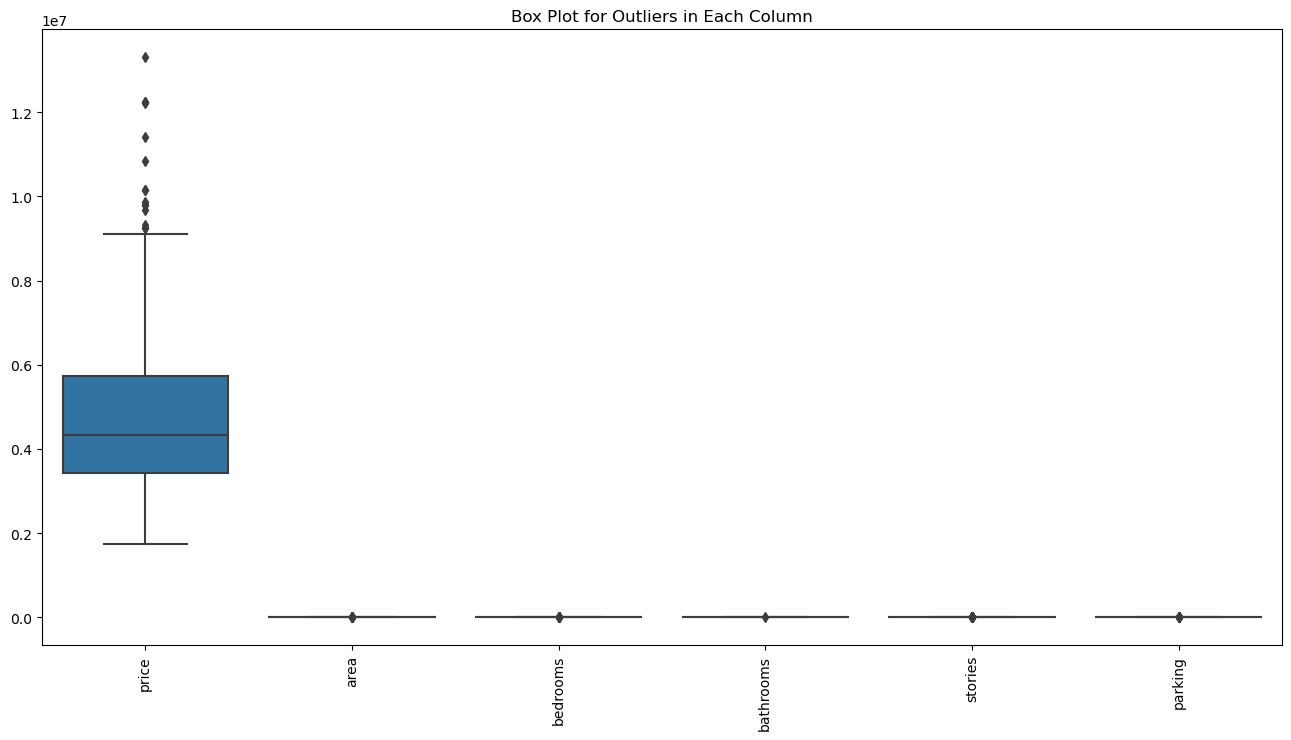

In [12]:
plt.figure(figsize=(16, 8))
sns.boxplot(data=df)
plt.xticks(rotation=90) 
plt.title("Box Plot for Outliers in Each Column")
plt.show()

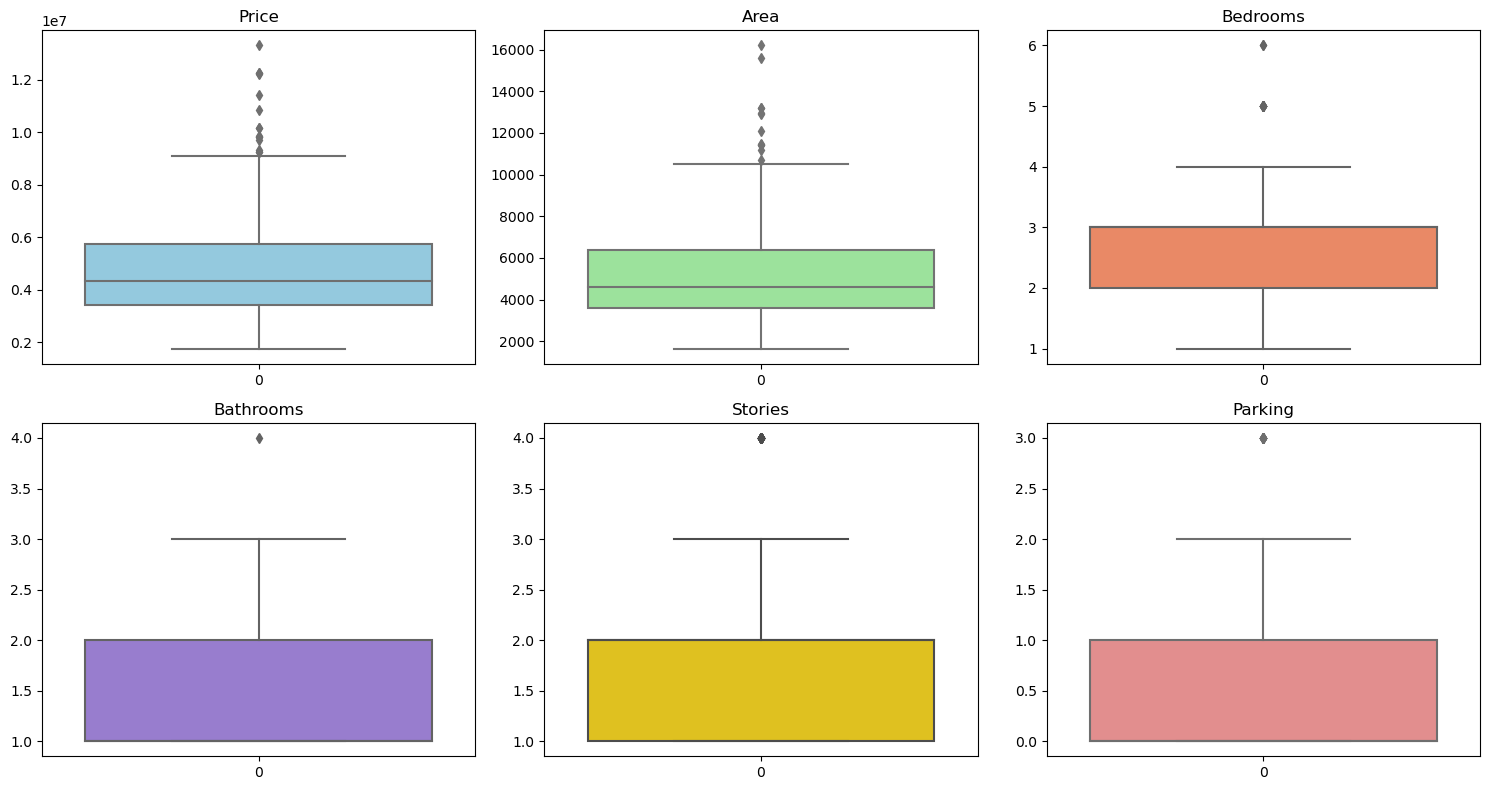

In [13]:
fig, axs = plt.subplots(2, 3, figsize=(15, 8))
plt1 = sns.boxplot(df['price'], ax=axs[0, 0], color='skyblue')
plt1.set_title('Price')
plt2 = sns.boxplot(df['area'], ax=axs[0, 1], color='lightgreen')
plt2.set_title('Area')
plt3 = sns.boxplot(df['bedrooms'], ax=axs[0, 2], color='coral')
plt3.set_title('Bedrooms')
plt4 = sns.boxplot(df['bathrooms'], ax=axs[1, 0], color='mediumpurple')
plt4.set_title('Bathrooms')
plt5 = sns.boxplot(df['stories'], ax=axs[1, 1], color='gold')
plt5.set_title('Stories')
plt6 = sns.boxplot(df['parking'], ax=axs[1, 2], color='lightcoral')
plt6.set_title('Parking')
plt.tight_layout()
plt.show()

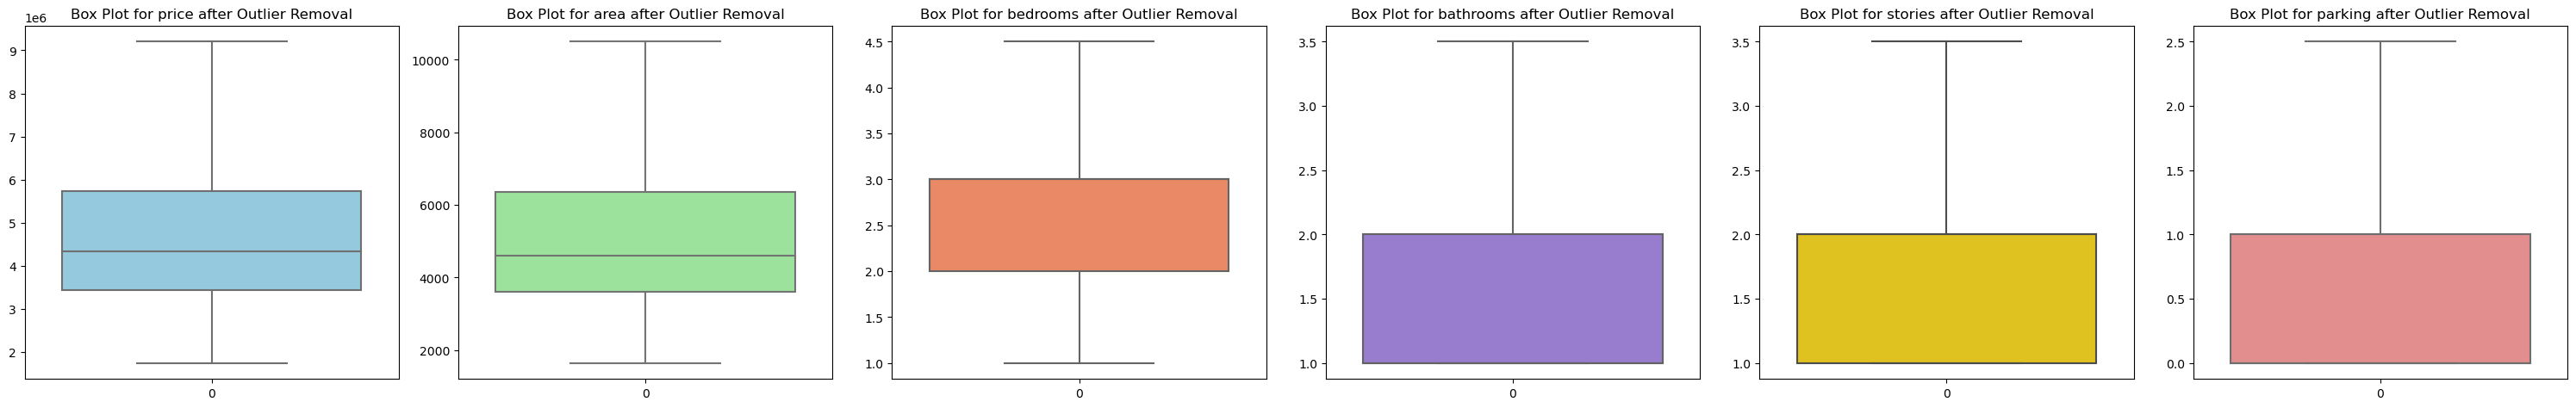

In [14]:
def remove_outliers(col):
    sorted_col = col.sort_values()
    q1, q3 = sorted_col.quantile([0.25, 0.75])
    IQR = q3 - q1
    lower_limit = q1 - (1.5 * IQR)
    upper_limit = q3 + (1.5 * IQR)
    return lower_limit, upper_limit
columns_to_remove_outliers = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
num_subplots = len(columns_to_remove_outliers)
fig, axs = plt.subplots(1, num_subplots, figsize=(5 * num_subplots, 5))
boxplot_colors = ['skyblue', 'lightgreen', 'coral', 'mediumpurple', 'gold', 'lightcoral']
for i, (column, color) in enumerate(zip(columns_to_remove_outliers, boxplot_colors)):
    lower_limit, upper_limit = remove_outliers(df[column])
    df[column] = np.where(df[column] > upper_limit, upper_limit, df[column])
    df[column] = np.where(df[column] < lower_limit, lower_limit, df[column])
    plt_i = sns.boxplot(df[column], ax=axs[i], color=color)
    plt_i.set_title(f'Box Plot for {column} after Outlier Removal')
plt.tight_layout()
plt.show()

In [15]:
df.head(3)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,9205000.0,7420.0,4.0,2.0,3.0,yes,no,no,no,yes,2.0,yes,furnished
1,9205000.0,8960.0,4.0,3.5,3.5,yes,no,no,no,yes,2.5,no,furnished
2,9205000.0,9960.0,3.0,2.0,2.0,yes,no,yes,no,no,2.0,yes,semi-furnished


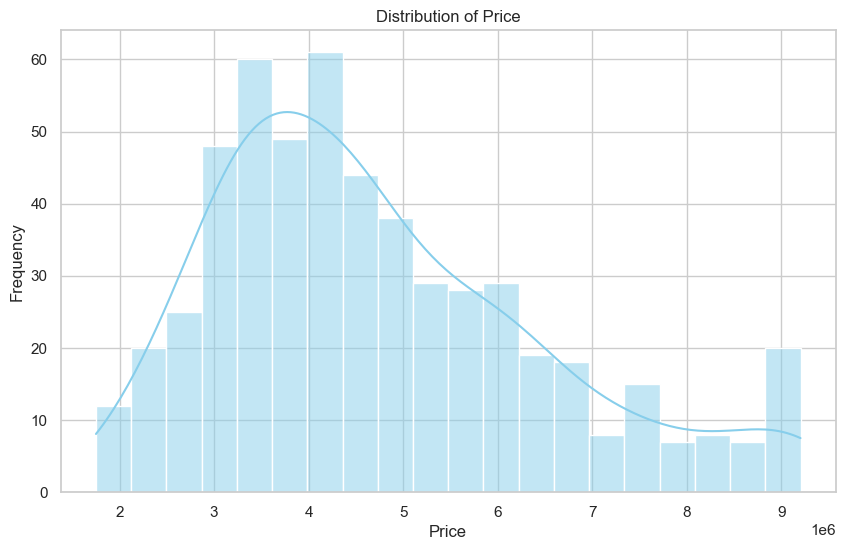

In [16]:
sns.set(style="whitegrid")

# Distribution of Price
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


In [17]:
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
def binary_map(x):
    return x.map({'yes': 1, "no": 0})
df[varlist] = df[varlist].apply(binary_map)

In [18]:
df.sample(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
480,2940000.0,3480.0,3.0,1.0,2.0,0,0,0,0,0,1.0,0,semi-furnished
346,3850000.0,2176.0,2.0,1.0,2.0,1,1,0,0,0,0.0,1,semi-furnished
487,2870000.0,5400.0,4.0,1.0,2.0,1,0,0,0,0,0.0,0,unfurnished
503,2660000.0,4000.0,3.0,1.0,1.0,1,0,0,0,0,0.0,0,semi-furnished
126,5880000.0,7160.0,3.0,1.0,1.0,1,0,1,0,0,2.0,1,unfurnished


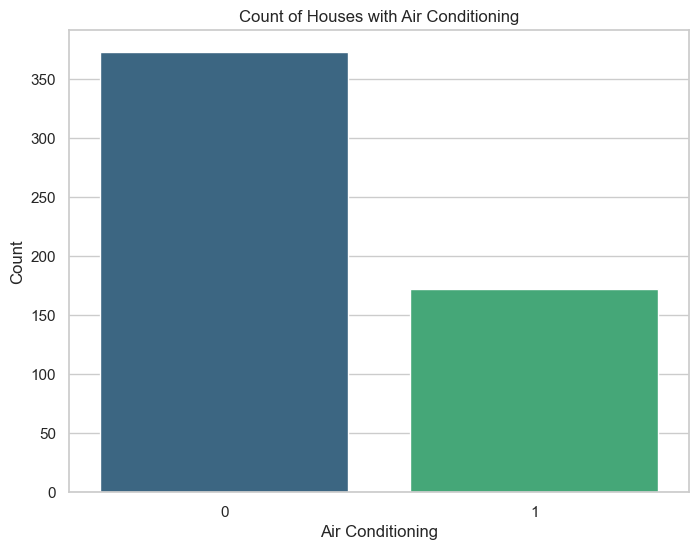

In [19]:
plt.figure(figsize=(8, 6))
sns.countplot(x='airconditioning', data=df, palette='viridis')
plt.title('Count of Houses with Air Conditioning')
plt.xlabel('Air Conditioning')
plt.ylabel('Count')
plt.show()

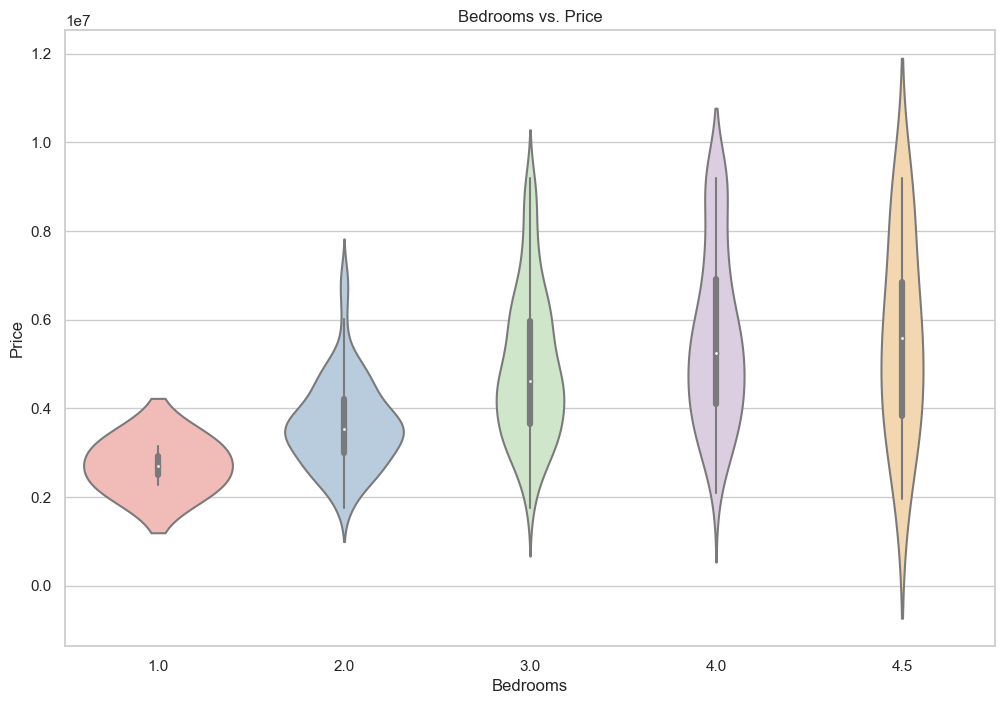

In [20]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='bedrooms', y='price', data=df, palette='Pastel1')
plt.title('Bedrooms vs. Price')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.show()

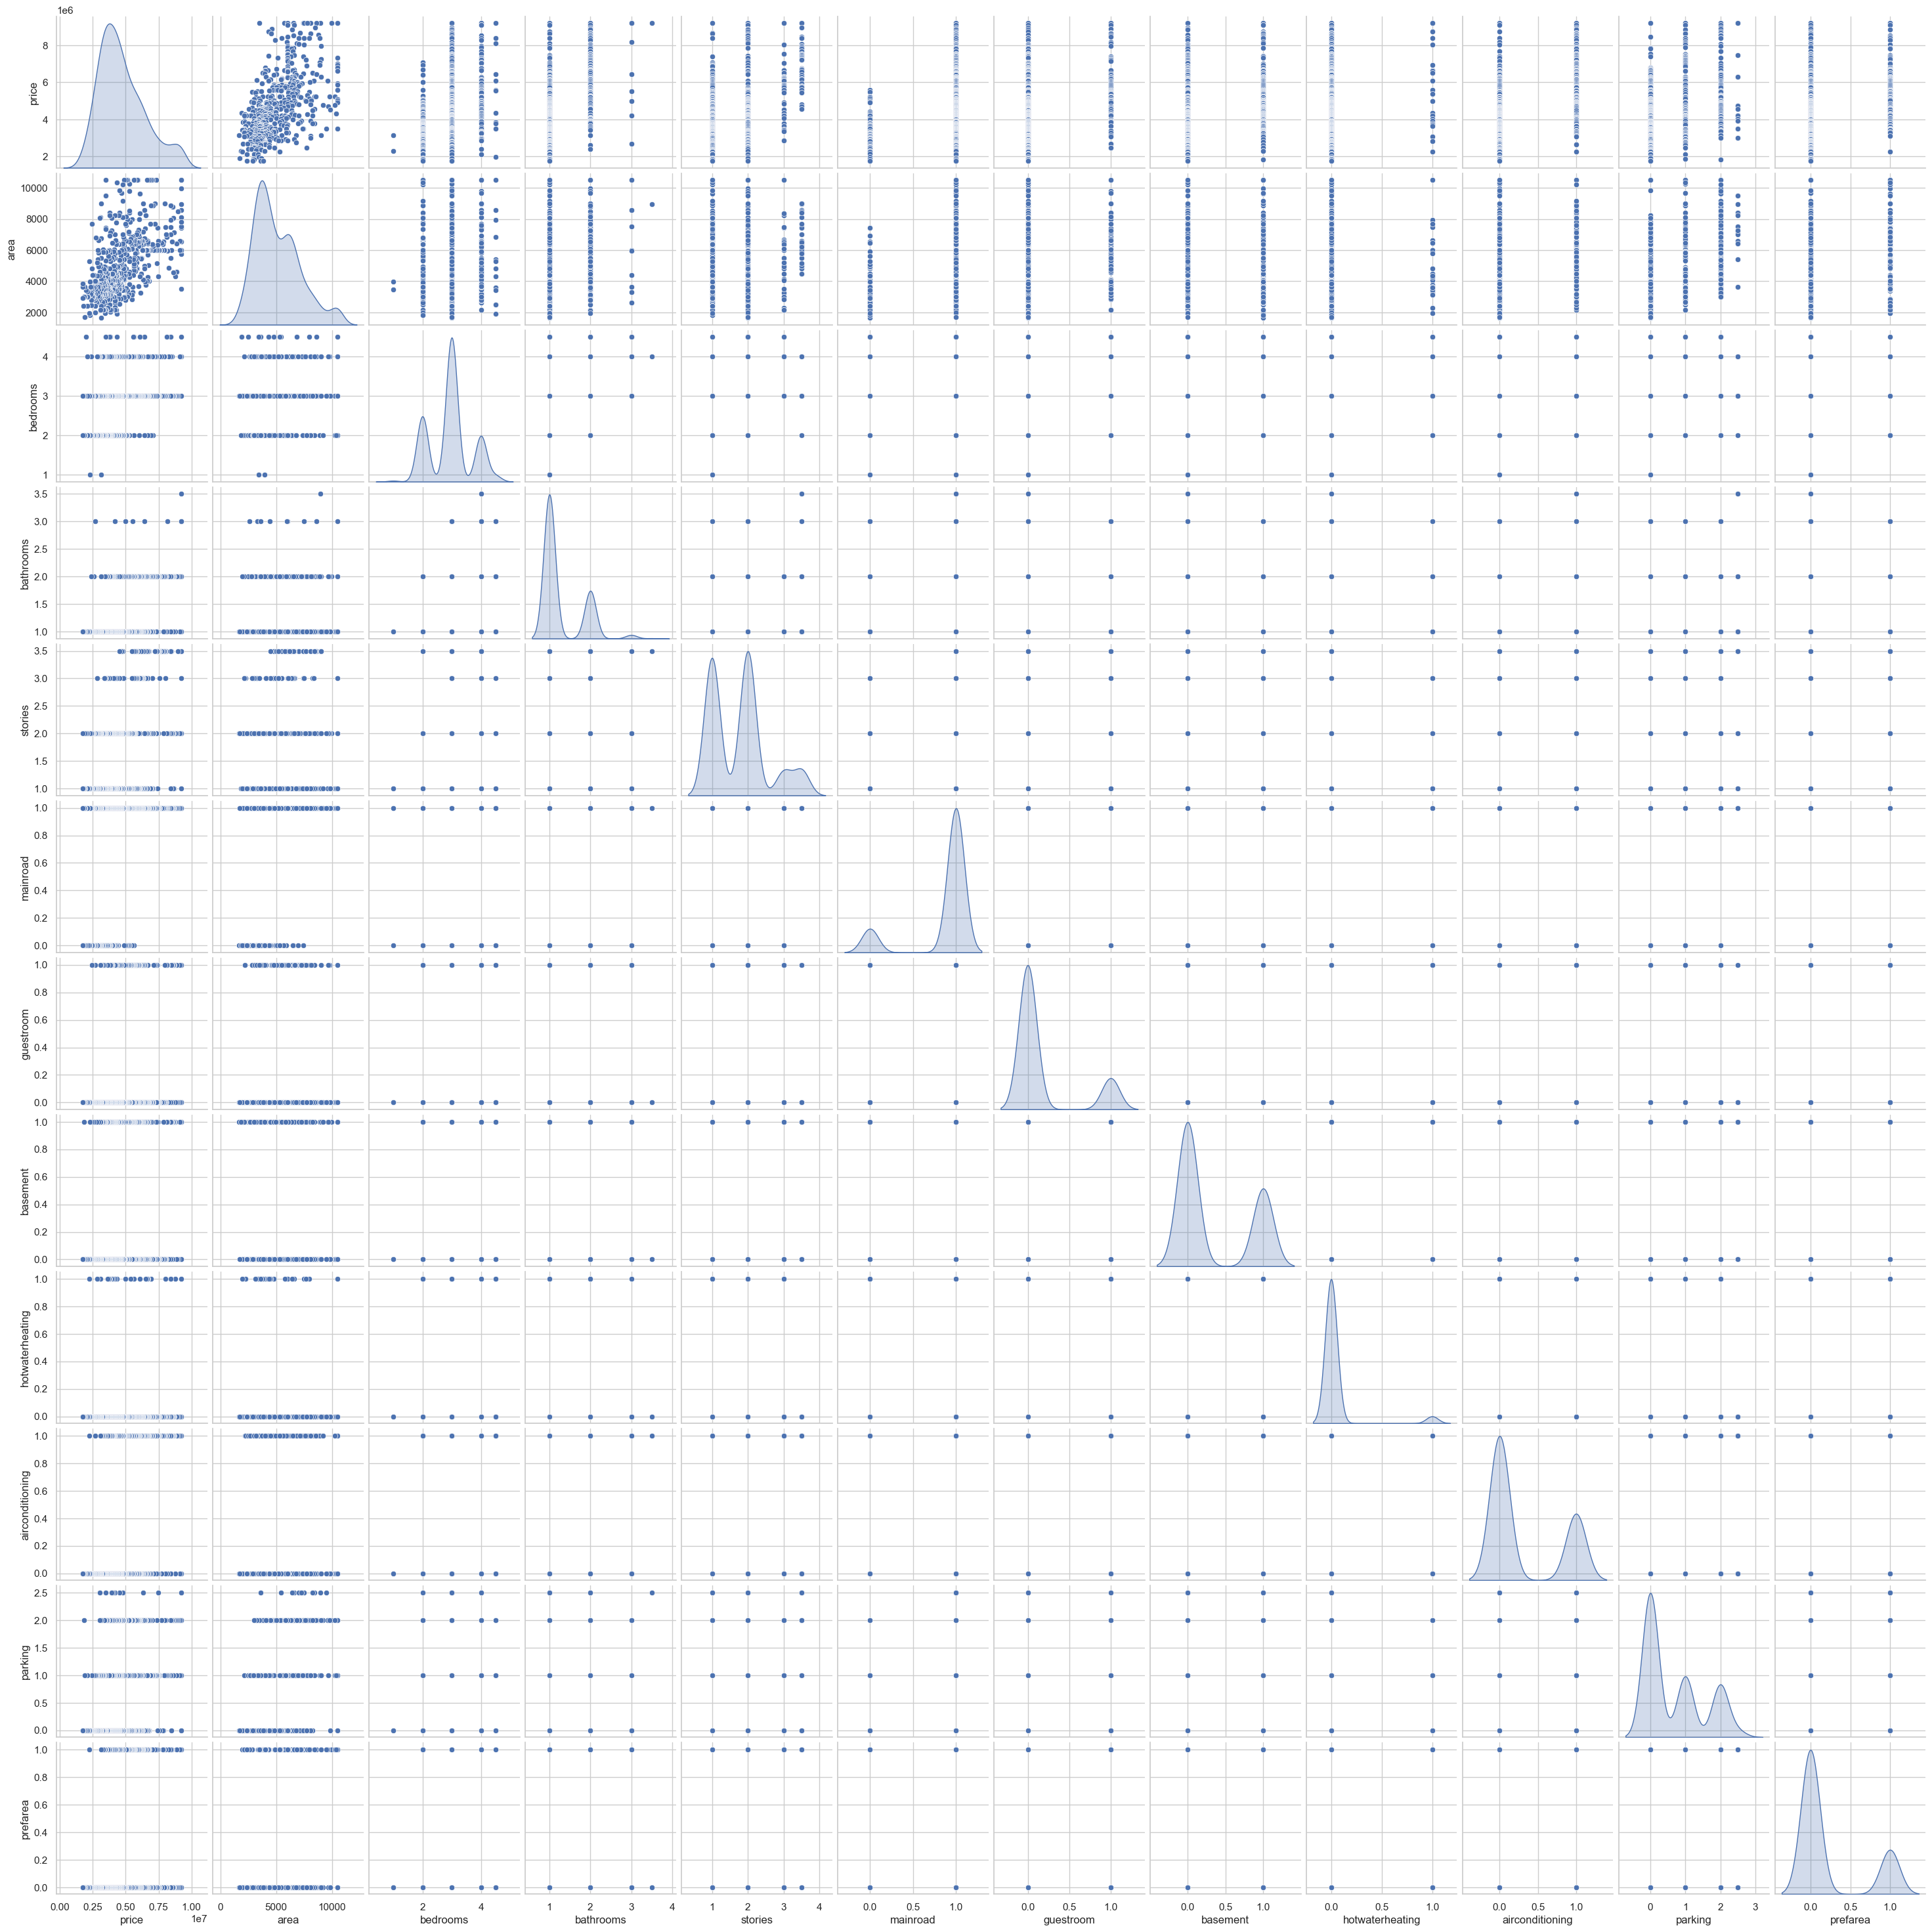

In [22]:
sns.pairplot(df,diag_kind="kde")

**Dummy Variables**

In [24]:
df["furnishingstatus"].unique()

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

The variable furnishingstatus has three levels. We need to convert these levels into integer as well.

For this, we will use something called dummy variables.



In [25]:
status = pd.get_dummies(df['furnishingstatus'])
status = status.astype(int)

In [26]:
status.head()

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


Now, we don't need three columns. You can drop the furnished column, as the type of furnishing can be identified with just the last two columns where —

00 will correspond to furnished

01 will correspond to unfurnished

10 will correspond to semi-furnished

In [27]:
status = pd.get_dummies(df['furnishingstatus'])
status = status.astype(int)
status = status.drop(status.columns[0], axis=1)

In [28]:
df = pd.concat([df, status], axis = 1)

In [29]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,9205000.0,7420.0,4.0,2.0,3.0,1,0,0,0,1,2.0,1,furnished,0,0
1,9205000.0,8960.0,4.0,3.5,3.5,1,0,0,0,1,2.5,0,furnished,0,0
2,9205000.0,9960.0,3.0,2.0,2.0,1,0,1,0,0,2.0,1,semi-furnished,1,0
3,9205000.0,7500.0,4.0,2.0,2.0,1,0,1,0,1,2.5,1,furnished,0,0
4,9205000.0,7420.0,4.0,1.0,2.0,1,1,1,0,1,2.0,0,furnished,0,0


In [30]:
df.drop(['furnishingstatus'], axis = 1, inplace = True)

In [31]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,9205000.0,7420.0,4.0,2.0,3.0,1,0,0,0,1,2.0,1,0,0
1,9205000.0,8960.0,4.0,3.5,3.5,1,0,0,0,1,2.5,0,0,0
2,9205000.0,9960.0,3.0,2.0,2.0,1,0,1,0,0,2.0,1,1,0
3,9205000.0,7500.0,4.0,2.0,2.0,1,0,1,0,1,2.5,1,0,0
4,9205000.0,7420.0,4.0,1.0,2.0,1,1,1,0,1,2.0,0,0,0


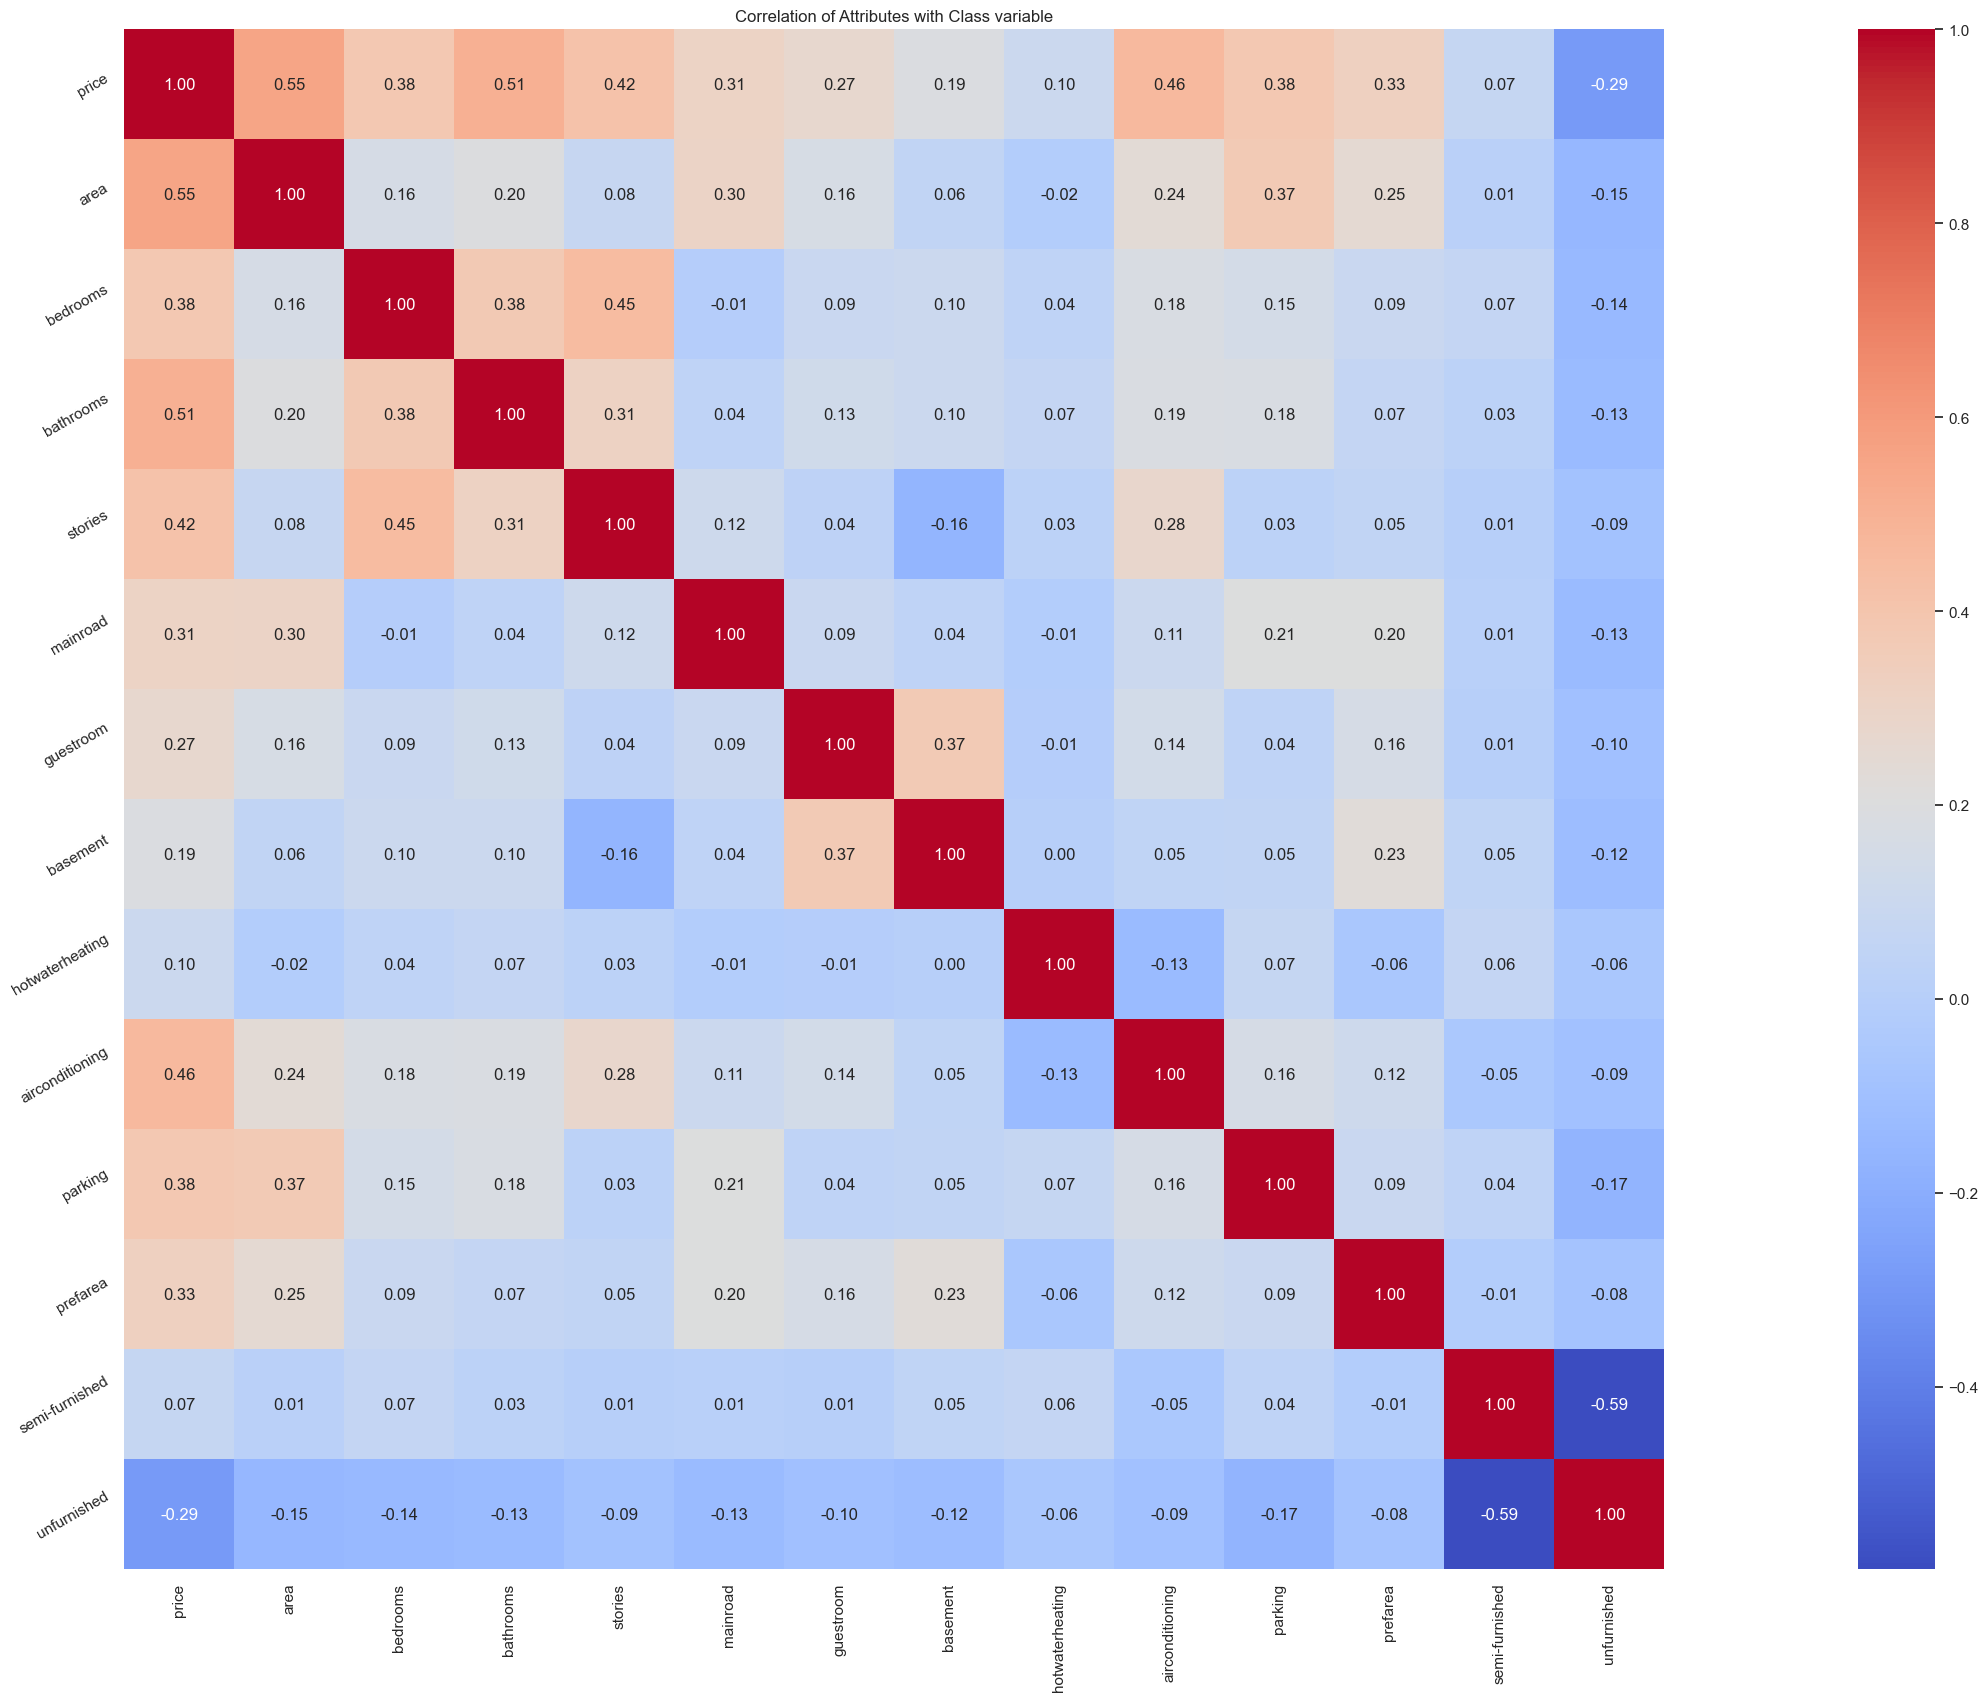

In [32]:
correlation=df.corr()
plt.figure(figsize=(50,20))
plt.title('Correlation of Attributes with Class variable')
a = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white',cmap="coolwarm")
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)  
plt.show()

## <a id="60" style="color:brown">Model Development:</a>

***Splitting the Data into Training and Testing Sets***

In [37]:
x= df.drop("price", axis=1)
y = df["price"]

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=0)

In [39]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [41]:
model.score(x_train,y_train)

0.6848873128694344

In [42]:
model.score(x_test,y_test)

0.6977507262936213

In [43]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [44]:
poly=PolynomialFeatures(degree=2,interaction_only=True)
x_train2=poly.fit_transform(x_train)
x_test2=poly.fit_transform(x_test)

In [45]:
model_1=linear_model.LinearRegression()
model_1.fit(x_train2,y_train)

LinearRegression()

In [46]:
model_1.score(x_train2,y_train)

0.7778826949211628

In [47]:
model_1.score(x_test2,y_test)

0.5677736603078605

In [48]:
from scipy.stats import zscore
XScaled=x.apply(zscore)
XScaled.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,1.156583,1.506093,1.436585,1.586075,0.405623,-0.465315,-0.734539,-0.219265,1.472618,1.579640,1.804941,-0.844888,-0.696429
1,1.925060,1.506093,4.451753,2.229717,0.405623,-0.465315,-0.734539,-0.219265,1.472618,2.179156,-0.554035,-0.844888,-0.696429
2,2.424072,0.071092,1.436585,0.298791,0.405623,-0.465315,1.361397,-0.219265,-0.679063,1.579640,1.804941,1.183588,-0.696429
3,1.196504,1.506093,1.436585,0.298791,0.405623,-0.465315,1.361397,-0.219265,1.472618,2.179156,1.804941,-0.844888,-0.696429
4,1.156583,1.506093,-0.573527,0.298791,0.405623,2.149083,1.361397,-0.219265,1.472618,1.579640,-0.554035,-0.844888,-0.696429


In [51]:
covMatrix = np.cov(XScaled,rowvar=False)
print(covMatrix)

[[ 1.00183824  0.15985626  0.19837743  0.07614203  0.30332354  0.16282438
   0.05525817 -0.01654876  0.24072299  0.36847556  0.2510328   0.01367324
  -0.15333414]
 [ 0.15985626  1.00183824  0.38020249  0.45071958 -0.00616976  0.08831237
   0.10207496  0.04083441  0.17607119  0.15001365  0.09235241  0.06552589
  -0.13882923]
 [ 0.19837743  0.38020249  1.00183824  0.31556695  0.04211241  0.12871315
   0.10458067  0.06829947  0.18624072  0.17549414  0.06519024  0.03172111
  -0.13226716]
 [ 0.07614203  0.45071958  0.31556695  1.00183824  0.11635849  0.03720997
  -0.1644975   0.03170187  0.2770991   0.02864243  0.05141179  0.00570721
  -0.0892317 ]
 [ 0.30332354 -0.00616976  0.04211241  0.11635849  1.00183824  0.09250666
   0.04408297 -0.01180315  0.10561679  0.20602249  0.2002432   0.01147138
  -0.13336798]
 [ 0.16282438  0.08831237  0.12871315  0.03720997  0.09250666  1.00183824
   0.37274965 -0.01032683  0.13843277  0.04201262  0.1611927   0.00583128
  -0.09920521]
 [ 0.05525817  0.10207

In [52]:
pca = PCA(n_components=6)
pca.fit(XScaled)

PCA(n_components=6)

In [53]:
print(pca.explained_variance_)

[2.51807296 1.56385641 1.51894774 1.27739919 1.0819317  0.90244292]


In [54]:
print(pca.components_)

[[ 0.37794362  0.35688887  0.35425055  0.29301444  0.25022212  0.24244493
   0.18402152  0.02078887  0.30763865  0.307244    0.25295473  0.14824866
  -0.29622138]
 [-0.04091783  0.30298679  0.24258559  0.46314438 -0.10704105 -0.1935257
  -0.34927709 -0.05989498  0.22892862 -0.0585976  -0.14081465 -0.45399822
   0.42059153]
 [ 0.22728466 -0.21929651 -0.13922368 -0.24731284  0.2132842   0.28159606
   0.2739258  -0.23794916  0.12737439  0.06636824  0.33565992 -0.51118033
   0.41068276]
 [-0.34738508  0.2572336   0.20884144  0.05703248 -0.41957108  0.43285524
   0.49984833  0.01974261 -0.03715469 -0.38296815  0.02499032 -0.0224706
   0.05891385]
 [ 0.09663296  0.06229128  0.19404031 -0.14376681 -0.01074879  0.01848904
   0.11312396  0.7656945  -0.35604102  0.32908609 -0.10143787 -0.21100461
   0.19759403]
 [ 0.14059056 -0.03913061  0.14554243 -0.33950359 -0.46557533  0.03665141
   0.08329843 -0.26207125  0.29310714  0.45933101 -0.50141634 -0.00933024
  -0.01148715]]


In [55]:
print(pca.explained_variance_ratio_)

[0.19334251 0.12007592 0.11662774 0.09808118 0.08307281 0.06929131]


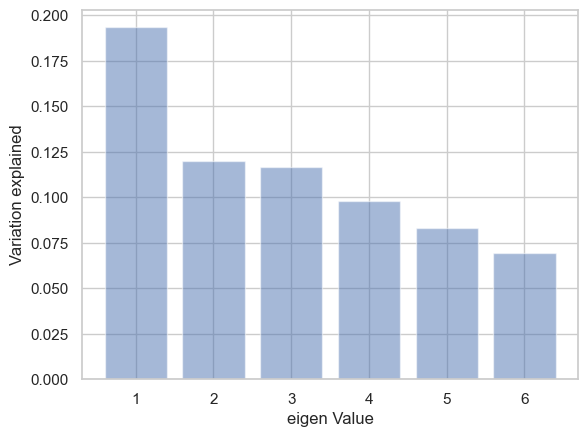

In [56]:
plt.bar(list(range(1,7)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

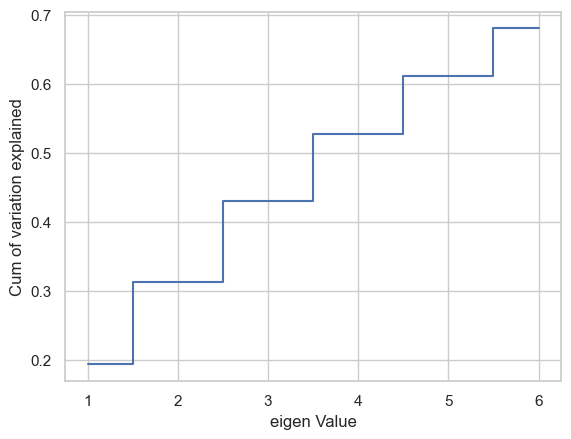

In [57]:
plt.step(list(range(1,7)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

# Dimensionality Reduction

Now 3 dimensions seems very reasonable. With 3 variables we can explain over 95% of the variation in the original data!

In [58]:
pca3 = PCA(n_components=3)
pca3.fit(XScaled)
print(pca3.components_)
print(pca3.explained_variance_ratio_)
Xpca3 = pca3.transform(XScaled)

[[ 0.37794362  0.35688887  0.35425055  0.29301444  0.25022212  0.24244493
   0.18402152  0.02078887  0.30763865  0.307244    0.25295473  0.14824866
  -0.29622138]
 [-0.04091783  0.30298679  0.24258559  0.46314438 -0.10704105 -0.1935257
  -0.34927709 -0.05989498  0.22892862 -0.0585976  -0.14081465 -0.45399822
   0.42059153]
 [ 0.22728466 -0.21929651 -0.13922368 -0.24731284  0.2132842   0.28159606
   0.2739258  -0.23794916  0.12737439  0.06636824  0.33565992 -0.51118033
   0.41068276]]
[0.19334251 0.12007592 0.11662774]


In [59]:
Xpca3

array([[ 3.27321948,  1.88946524,  0.19091322],
       [ 4.40786537,  3.1846045 , -0.96541229],
       [ 2.88740635, -1.33895086,  0.37519102],
       ...,
       [-2.56127815,  0.29441796,  0.95655793],
       [-2.26978606,  0.15417469, -0.92670039],
       [-1.62857214,  1.32070609,  0.34959158]])

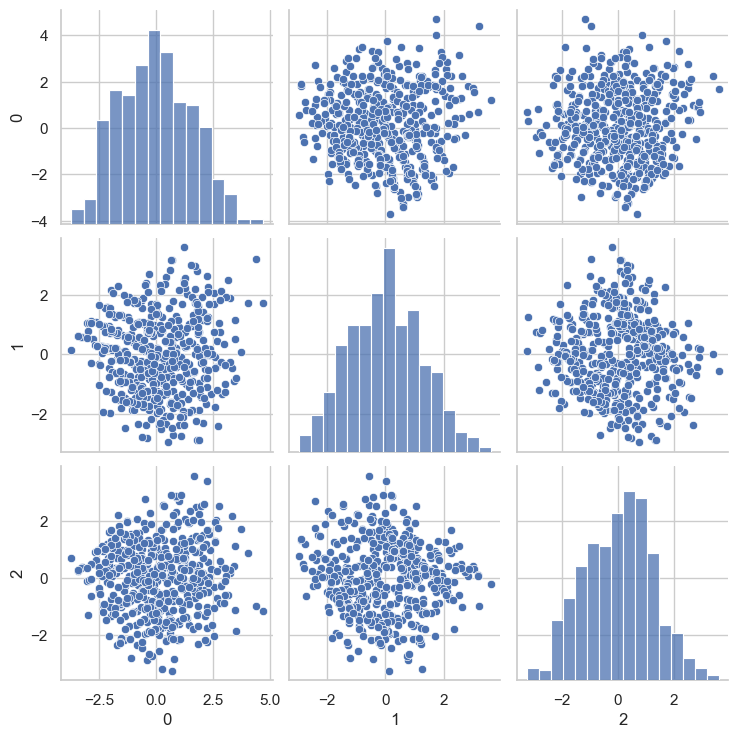

In [60]:
sns.pairplot(pd.DataFrame(Xpca3))

## Fit Linear Model

Lets construct two linear models. The first with all the 6 independent variables and the second with only the 3 new variables constructed using PCA.

In [61]:
regression_model = LinearRegression()
regression_model.fit(XScaled, y)
regression_model.score(XScaled, y)

0.6922387890736981

In [62]:
regression_model_pca = LinearRegression()
regression_model_pca.fit(Xpca3, y)
regression_model_pca.score(Xpca3, y)

0.6545062608772453